In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file = '/content/drive/My Drive/CSE422 Project/modified_mobile_price.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv(csv_file)
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,smooth
0,1954,no,0.5,yes,0.0,no,24,0.8,187,4,...,1149,700,16,3,5,yes,yes,yes,low,NaN
1,842,no,2.2,no,1.0,no,7,0.6,188,2,...,756,2549,9,7,19,no,no,yes,mid,NaN
2,1021,yes,0.5,yes,0.0,yes,53,0.7,136,3,...,1988,2631,17,3,7,yes,yes,no,upper-mid,NaN
3,1821,no,1.7,no,4.0,yes,10,0.8,139,8,...,1018,3220,13,8,18,yes,no,yes,flagship,NaN
4,563,yes,0.5,yes,2.0,yes,41,0.9,145,5,...,1716,2603,11,2,9,yes,yes,no,upper-mid,NaN
5,615,yes,2.5,no,0.0,no,10,0.8,131,6,...,1786,2769,16,8,11,yes,no,no,upper-mid,NaN
6,1821,yes,1.2,no,13.0,yes,44,0.6,141,2,...,1212,1411,8,2,15,yes,yes,no,mid,NaN
7,1859,no,0.5,yes,3.0,no,22,0.7,164,1,...,1654,1067,17,1,10,yes,no,no,mid,NaN
8,1445,yes,0.5,no,0.0,no,53,0.7,174,7,...,836,1099,17,1,20,yes,no,no,low,NaN
9,509,yes,0.6,yes,2.0,yes,9,0.1,93,5,...,1224,513,19,10,12,yes,no,no,low,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             1990 non-null   float64
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [ ]:
# use to see all features
dataset.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'smooth'],
      dtype='object')

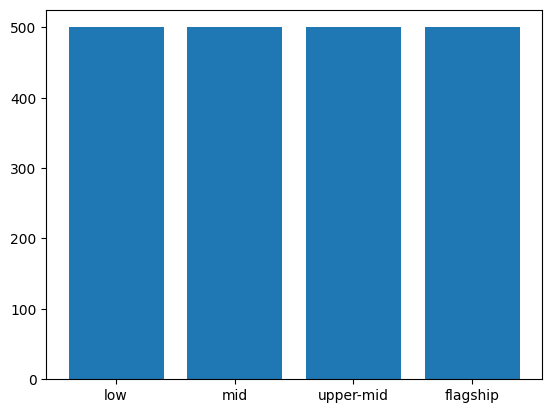

In [ ]:
x = np.array(["low", "mid", "upper-mid", "flagship"])
y = np.array([dataset['price_range'].value_counts()['low'], dataset['price_range'].value_counts()['mid'], dataset['price_range'].value_counts()['upper-mid'], dataset['price_range'].value_counts()['flagship']])

plt.bar(x, y)
plt.show()

# **DATASET PREPROCESSING**

In [ ]:
dataset.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                 10
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range         0
smooth           2000
dtype: int64

### **DROPPING**

The whole column "smooth" is with Nan Value. Hence, dropping this column

In [ ]:
#drop the smooth column that added previously
dataset = dataset.drop(['smooth'],axis=1) #Axis = 1 means column removed

In [ ]:
dataset.isnull().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc               10
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

Drop the rows where fc have Nan values

In [ ]:
dataset = dataset[dataset['fc'].notnull()]

In [ ]:
dataset.shape

(1990, 21)

In [ ]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
dataset.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1954,no,0.5,yes,0.0,no,24,0.8,187,4,...,512,1149,700,16,3,5,yes,yes,yes,low
1,842,no,2.2,no,1.0,no,7,0.6,188,2,...,20,756,2549,9,7,19,no,no,yes,mid
2,1021,yes,0.5,yes,0.0,yes,53,0.7,136,3,...,905,1988,2631,17,3,7,yes,yes,no,upper-mid
3,1821,no,1.7,no,4.0,yes,10,0.8,139,8,...,381,1018,3220,13,8,18,yes,no,yes,flagship
4,563,yes,0.5,yes,2.0,yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,yes,yes,no,upper-mid


### **ENCODING**

In [ ]:
# blue encoding
enc = LabelEncoder()
# Apply the encoding to the "blue" column
dataset['blue_enc'] = enc.fit_transform(dataset['blue'])
# Compare the two columns
dataset[['blue','blue_enc']]

,blue,blue_enc
0,no,0
1,no,0
2,yes,1
3,no,0
4,yes,1
...,...,...
1995,yes,1
1996,yes,1
1997,no,0
1998,no,0


In [ ]:
# dual_sim encoding
enc = LabelEncoder()
# Apply the encoding to the "dual_sim" column
dataset['dual_sim_enc'] = enc.fit_transform(dataset['dual_sim'])
# Compare the two columns
dataset[['dual_sim','dual_sim_enc']]

,dual_sim,dual_sim_enc
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1
...,...,...
1995,yes,1
1996,yes,1
1997,yes,1
1998,no,0


In [ ]:
#four_g encoding
enc = LabelEncoder()
# Apply the encoding to the "four_g" column
dataset['four_g_enc'] = enc.fit_transform(dataset['four_g'])
# Compare the two columns
dataset[['four_g','four_g_enc']]

,four_g,four_g_enc
0,no,0
1,no,0
2,yes,1
3,yes,1
4,yes,1
...,...,...
1995,yes,1
1996,no,0
1997,yes,1
1998,yes,1


In [ ]:
#three_g
#three_g encoding
enc = LabelEncoder()
# Apply the encoding to the "three_g" column
dataset['three_g_enc'] = enc.fit_transform(dataset['three_g'])
# Compare the two columns
dataset[['three_g','three_g_enc']]

,three_g,three_g_enc
0,yes,1
1,no,0
2,yes,1
3,yes,1
4,yes,1
...,...,...
1995,yes,1
1996,yes,1
1997,yes,1
1998,yes,1


In [ ]:
#touch_screen encoding
enc = LabelEncoder()
# Apply the encoding to the "touch_screen" column
dataset['touch_screen_enc'] = enc.fit_transform(dataset['touch_screen'])
# Compare the two columns
dataset[['touch_screen','touch_screen_enc']]

,touch_screen,touch_screen_enc
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1
...,...,...
1995,yes,1
1996,yes,1
1997,yes,1
1998,yes,1


In [ ]:
#wifi encoding
enc = LabelEncoder()
# Apply the encoding to the "wifi" column
dataset['wifi_enc'] = enc.fit_transform(dataset['wifi'])
# Compare the two columns
dataset[['wifi','wifi_enc']]

,wifi,wifi_enc
0,yes,1
1,yes,1
2,no,0
3,yes,1
4,no,0
...,...,...
1995,no,0
1996,yes,1
1997,no,0
1998,yes,1


In [ ]:
#price_range encoding
enc = LabelEncoder()
# Apply the encoding to the "price_range" column
dataset['price_range_enc'] = enc.fit_transform(dataset['price_range'])
# Compare the two columns
dataset[['price_range','price_range_enc']]

,price_range,price_range_enc
0,low,1
1,mid,2
2,upper-mid,3
3,flagship,0
4,upper-mid,3
...,...,...
1995,low,1
1996,upper-mid,3
1997,flagship,0
1998,low,1


In [ ]:
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,blue_enc,dual_sim_enc,four_g_enc,three_g_enc,touch_screen_enc,wifi_enc,price_range_enc
0,1954,no,0.5,yes,0.0,no,24,0.8,187,4,...,yes,yes,low,0,1,0,1,1,1,1
1,842,no,2.2,no,1.0,no,7,0.6,188,2,...,no,yes,mid,0,0,0,0,0,1,2
2,1021,yes,0.5,yes,0.0,yes,53,0.7,136,3,...,yes,no,upper-mid,1,1,1,1,1,0,3
3,1821,no,1.7,no,4.0,yes,10,0.8,139,8,...,no,yes,flagship,0,0,1,1,0,1,0
4,563,yes,0.5,yes,2.0,yes,41,0.9,145,5,...,yes,no,upper-mid,1,1,1,1,1,0,3
5,615,yes,2.5,no,0.0,no,10,0.8,131,6,...,no,no,upper-mid,1,0,0,1,0,0,3
6,1821,yes,1.2,no,13.0,yes,44,0.6,141,2,...,yes,no,mid,1,0,1,1,1,0,2
7,1859,no,0.5,yes,3.0,no,22,0.7,164,1,...,no,no,mid,0,1,0,1,0,0,2
8,1445,yes,0.5,no,0.0,no,53,0.7,174,7,...,no,no,low,1,0,0,1,0,0,1
9,509,yes,0.6,yes,2.0,yes,9,0.1,93,5,...,no,no,low,1,1,1,1,0,0,1


In [ ]:
dataset.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'blue_enc', 'dual_sim_enc',
       'four_g_enc', 'three_g_enc', 'touch_screen_enc', 'wifi_enc',
       'price_range_enc'],
      dtype='object')

### **CORRELATION**

In [ ]:
encoded_dataset = dataset[['battery_power','clock_speed','fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'blue_enc', 'dual_sim_enc',
       'four_g_enc', 'three_g_enc', 'touch_screen_enc', 'wifi_enc',
       'price_range_enc']]

In [ ]:
dcorr = encoded_dataset.corr()
dcorr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue_enc,dual_sim_enc,four_g_enc,three_g_enc,touch_screen_enc,wifi_enc,price_range_enc
battery_power,1.000000,0.013266,0.031992,-0.004774,0.035197,0.000916,-0.031845,0.028535,0.014860,-0.007848,...,-0.032867,-0.022848,0.054606,0.012868,-0.044872,0.015495,0.013869,-0.010411,-0.009463,-0.085790
clock_speed,0.013266,1.000000,-0.000331,0.010540,-0.011395,0.015103,-0.006667,-0.003592,-0.014192,-0.009836,...,-0.026158,-0.004345,-0.013832,0.017926,0.002298,-0.043605,-0.045398,0.017918,-0.025309,-0.002469
fc,0.031992,-0.000331,1.000000,-0.029133,-0.001480,0.024491,-0.012246,0.644908,-0.011962,-0.005224,...,-0.013260,-0.013352,-0.008147,0.002072,-0.030039,-0.015984,0.003119,-0.015607,0.019855,0.021817
int_memory,-0.004774,0.010540,-0.029133,1.000000,0.006044,-0.034143,-0.028544,-0.032936,0.009729,-0.008358,...,0.036752,0.008836,0.000544,0.042807,-0.017243,0.008966,-0.010880,-0.025398,0.008578,-0.053184
m_dep,0.035197,-0.011395,-0.001480,0.006044,1.000000,0.020154,0.000139,0.026808,0.024840,0.025059,...,-0.025587,-0.016907,0.016547,0.007226,-0.024725,-0.002228,-0.012337,-0.001242,-0.027128,0.000549
mobile_wt,0.000916,0.015103,0.024491,-0.034143,0.020154,1.000000,-0.018376,0.016457,0.000907,-0.002368,...,-0.035116,-0.021377,0.005717,-0.005428,-0.009726,-0.017460,0.002156,-0.012466,-0.001149,0.067192
n_cores,-0.031845,-0.006667,-0.012246,-0.028544,0.000139,-0.018376,1.000000,-0.001568,-0.004255,0.025626,...,-0.001338,0.023789,0.013633,0.034165,-0.023459,-0.027826,-0.013972,0.023067,-0.008246,0.010525
pc,0.028535,-0.003592,0.644908,-0.032936,0.026808,0.016457,-0.001568,1.000000,-0.018872,0.004707,...,0.000870,-0.024891,0.012903,-0.009615,-0.019468,-0.006366,0.000260,-0.011242,0.004196,-0.000006
px_height,0.014860,-0.014192,-0.011962,0.009729,0.024840,0.000907,-0.004255,-0.018872,1.000000,0.511047,...,0.059525,0.042929,-0.010161,-0.007298,-0.020937,-0.019685,-0.030851,0.023792,0.051497,-0.052875
px_width,-0.007848,-0.009836,-0.005224,-0.008358,0.025059,-0.002368,0.025626,0.004707,0.511047,1.000000,...,0.022517,0.033551,0.007361,-0.041737,0.015725,0.006821,-0.000308,-0.000069,0.028758,-0.081572


<Axes: >

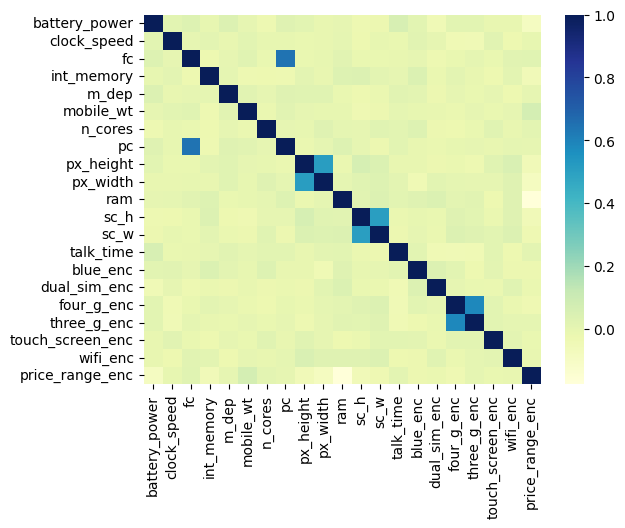

In [ ]:
sns.heatmap(dcorr, cmap = 'YlGnBu')

In [ ]:
#Dropping fc, px_width, sc_w, four_g

encoded_dataset2 = dataset[['battery_power',  'clock_speed',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h','talk_time',
        'blue_enc', 'dual_sim_enc',
        'three_g_enc', 'touch_screen_enc', 'wifi_enc',
       'price_range_enc']]

In [ ]:
dcorr2 = encoded_dataset2.corr()
dcorr2

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,talk_time,blue_enc,dual_sim_enc,three_g_enc,touch_screen_enc,wifi_enc,price_range_enc
battery_power,1.000000,0.013266,-0.004774,0.035197,0.000916,-0.031845,0.028535,0.014860,-0.000504,-0.032867,0.054606,0.012868,-0.044872,0.013869,-0.010411,-0.009463,-0.085790
clock_speed,0.013266,1.000000,0.010540,-0.011395,0.015103,-0.006667,-0.003592,-0.014192,0.004388,-0.026158,-0.013832,0.017926,0.002298,-0.045398,0.017918,-0.025309,-0.002469
int_memory,-0.004774,0.010540,1.000000,0.006044,-0.034143,-0.028544,-0.032936,0.009729,0.031382,0.036752,0.000544,0.042807,-0.017243,-0.010880,-0.025398,0.008578,-0.053184
m_dep,0.035197,-0.011395,0.006044,1.000000,0.020154,0.000139,0.026808,0.024840,-0.011540,-0.025587,0.016547,0.007226,-0.024725,-0.012337,-0.001242,-0.027128,0.000549
mobile_wt,0.000916,0.015103,-0.034143,0.020154,1.000000,-0.018376,0.016457,0.000907,-0.002438,-0.035116,0.005717,-0.005428,-0.009726,0.002156,-0.012466,-0.001149,0.067192
n_cores,-0.031845,-0.006667,-0.028544,0.000139,-0.018376,1.000000,-0.001568,-0.004255,0.003681,-0.001338,0.013633,0.034165,-0.023459,-0.013972,0.023067,-0.008246,0.010525
pc,0.028535,-0.003592,-0.032936,0.026808,0.016457,-0.001568,1.000000,-0.018872,0.030443,0.000870,0.012903,-0.009615,-0.019468,0.000260,-0.011242,0.004196,-0.000006
px_height,0.014860,-0.014192,0.009729,0.024840,0.000907,-0.004255,-0.018872,1.000000,-0.019654,0.059525,-0.010161,-0.007298,-0.020937,-0.030851,0.023792,0.051497,-0.052875
ram,-0.000504,0.004388,0.031382,-0.011540,-0.002438,0.003681,0.030443,-0.019654,1.000000,0.016914,0.011991,0.027415,0.041823,0.016874,-0.029525,0.027274,-0.176938
sc_h,-0.032867,-0.026158,0.036752,-0.025587,-0.035116,-0.001338,0.000870,0.059525,0.016914,1.000000,-0.017431,-0.002653,-0.013989,0.012901,-0.020135,0.025736,-0.056872


<Axes: >

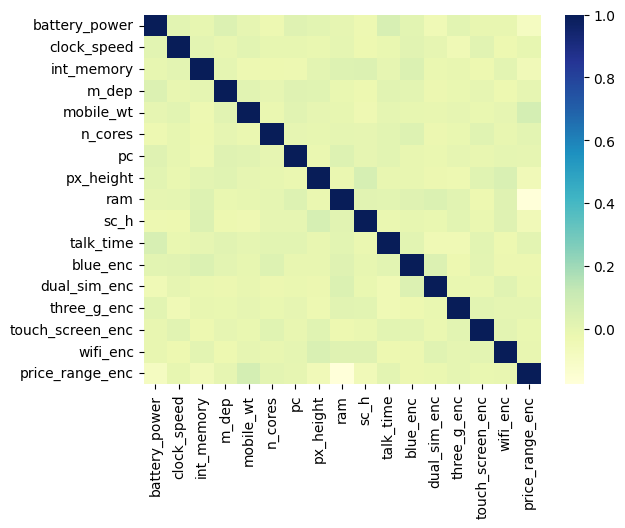

In [ ]:
sns.heatmap(dcorr2, cmap = 'YlGnBu')

# **DATASET SPLITTING**

In [ ]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(dataset[['battery_power',  'clock_speed',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h','talk_time',
        'blue_enc', 'dual_sim_enc',
        'three_g_enc', 'touch_screen_enc', 'wifi_enc']], dataset[
       'price_range_enc'], test_size=0.3, random_state=0)

In [ ]:
X_train

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,talk_time,blue_enc,dual_sim_enc,three_g_enc,touch_screen_enc,wifi_enc
1705,1290,1.4,35,0.3,110,4,20,405,879,16,8,1,1,1,0,0
1607,744,1.7,33,0.5,105,4,2,1252,2700,9,19,0,1,1,0,0
487,1663,2.5,27,0.3,169,4,14,831,2084,7,18,1,1,1,0,0
850,840,0.6,63,0.8,137,7,19,987,3486,12,18,0,0,1,1,0
376,1899,0.6,26,0.1,151,2,0,96,336,13,4,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,1438,1.8,16,0.6,169,8,7,859,2246,14,15,1,0,0,0,0
1224,1515,2.6,56,0.9,184,3,1,1438,262,14,20,0,0,1,1,0
1663,1416,1.8,20,0.1,93,4,0,1175,3872,10,7,1,1,0,0,1
564,574,2.8,38,0.1,90,6,17,286,3269,8,10,0,1,0,1,0


In [ ]:
X_test

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,talk_time,blue_enc,dual_sim_enc,three_g_enc,touch_screen_enc,wifi_enc
1301,1874,0.6,19,0.8,192,2,9,1238,1218,15,17,1,0,0,1,0
1319,987,2.3,17,0.8,124,7,17,887,3885,11,14,1,0,1,1,0
968,1923,0.5,46,0.5,191,1,10,767,1489,10,3,0,1,1,1,1
109,1775,1.5,41,0.1,163,1,7,1633,2343,19,14,1,0,1,1,1
1565,1062,0.5,39,0.9,124,4,4,571,1345,16,11,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,783,1.8,43,1.0,106,3,4,1198,2016,16,18,0,1,1,1,0
1621,962,1.1,17,0.1,161,8,20,546,3438,14,20,1,1,0,0,0
1424,1352,2.4,6,0.9,92,6,9,629,1309,12,14,0,0,1,0,0
2,1021,0.5,53,0.7,136,3,6,905,2631,17,7,1,1,1,1,0


In [ ]:
y_train

1705    1
1607    3
487     3
850     0
376     1
       ..
843     3
1224    1
1663    0
564     3
691     1
Name: price_range_enc, Length: 1393, dtype: int64

In [ ]:
y_test

1301    2
1319    0
968     2
109     0
1565    1
       ..
110     2
1621    0
1424    2
2       3
1534    3
Name: price_range_enc, Length: 597, dtype: int64

# **Feature Scaling**

**Min Max Scaler**

In [ ]:
#Min max Scalr
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.52705411, 0.36      , 0.53225806, ..., 1.        , 0.        ,
        0.        ],
       [0.16232465, 0.48      , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.7762191 , 0.8       , 0.40322581, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.61122244, 0.52      , 0.29032258, ..., 0.        , 0.        ,
        1.        ],
       [0.0487642 , 0.92      , 0.58064516, ..., 0.        , 1.        ,
        0.        ],
       [0.65798263, 0.84      , 0.80645161, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X_test_scaled

array([[0.91716767, 0.04      , 0.27419355, ..., 0.        , 1.        ,
        0.        ],
       [0.3246493 , 0.72      , 0.24193548, ..., 1.        , 1.        ,
        0.        ],
       [0.9498998 , 0.        , 0.70967742, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.56847027, 0.76      , 0.06451613, ..., 1.        , 0.        ,
        0.        ],
       [0.34736139, 0.        , 0.82258065, ..., 1.        , 1.        ,
        0.        ],
       [0.08082832, 0.56      , 0.14516129, ..., 1.        , 1.        ,
        1.        ]])

# **MODELS**

### **KNN**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
knn_predictions = knn.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_accuracy

0.916247906197655

In [ ]:
knn_macro_precision = precision_score(y_test, knn_predictions, average='macro')
knn_macro_precision

0.917694207925996

In [ ]:
knn_macro_recall = recall_score(y_test, knn_predictions, average='macro')
knn_macro_recall

0.9176450511852168

In [ ]:
knn_cm = confusion_matrix(knn_predictions, y_test)
print(knn_cm)

[[138   0   0   2]
 [  0 137  14   0]
 [  0   4 139  10]
 [ 15   0   5 133]]


<Axes: >

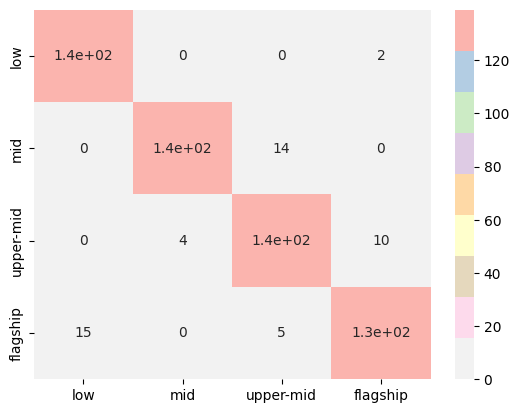

In [ ]:
sns.heatmap(knn_cm, cmap="Pastel1_r", xticklabels=['low' ,'mid' ,'upper-mid', 'flagship'], yticklabels=['low' ,'mid' ,'upper-mid', 'flagship'], annot=True)

### **RANDOM FOREST**

In [ ]:
rfc = RandomForestClassifier(n_estimators=70)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=70)

In [ ]:
rfc_predictions = rfc.predict(X_test_scaled)

In [ ]:
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
rfc_accuracy

0.8559463986599665

In [ ]:
rfc_macro_precision = precision_score(y_test, rfc_predictions, average='macro')
rfc_macro_precision

0.8559362596035917

In [ ]:
rfc_macro_recall = recall_score(y_test, rfc_predictions, average='macro')
rfc_macro_recall

0.857543976383982

In [ ]:
rfc_cm = confusion_matrix(rfc_predictions, y_test)
print(rfc_cm)

[[135   0   0  11]
 [  0 134  20   0]
 [  0   7 126  18]
 [ 18   0  12 116]]


<Axes: >

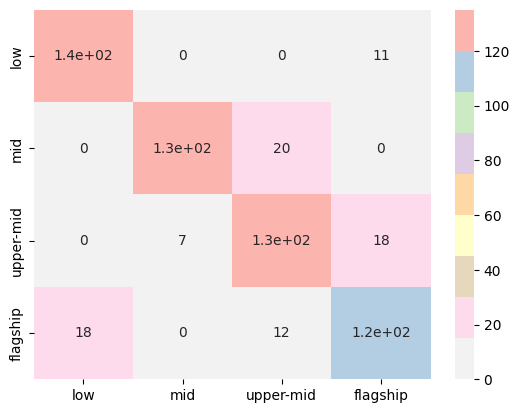

In [ ]:
sns.heatmap(rfc_cm, cmap="Pastel1_r", xticklabels=['low' ,'mid' ,'upper-mid', 'flagship'], yticklabels=['low' ,'mid' ,'upper-mid', 'flagship'], annot=True)

### **NAIVE BAYES**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
gnb_predictions = gnb.predict(X_test_scaled)

In [ ]:
gnb_accuracy=accuracy_score(y_test, gnb_predictions)
gnb_accuracy

0.8090452261306532

In [ ]:
gnb_macro_precision = precision_score(y_test, gnb_predictions, average='macro')
gnb_macro_precision

0.8088779442560285

In [ ]:
gnb_macro_recall = recall_score(y_test, gnb_predictions, average='macro')
gnb_macro_recall

0.8102898216349175

In [ ]:
gnb_cm = confusion_matrix(gnb_predictions, y_test)
print(gnb_cm)

[[133   0   0  15]
 [  0 128  23   0]
 [  0  13 118  26]
 [ 20   0  17 104]]


<Axes: >

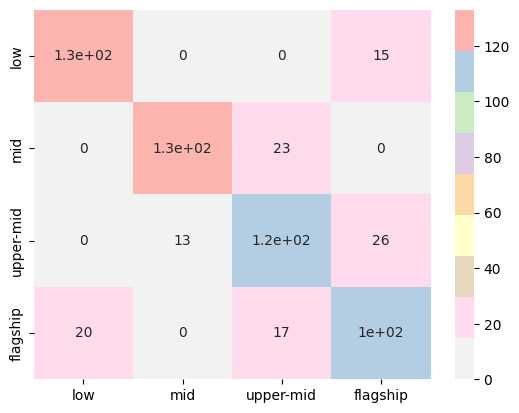

In [ ]:
sns.heatmap(gnb_cm, cmap="Pastel1_r", xticklabels=['low' ,'mid' ,'upper-mid', 'flagship'], yticklabels=['low' ,'mid' ,'upper-mid', 'flagship'], annot=True)

### **COMPARISON**

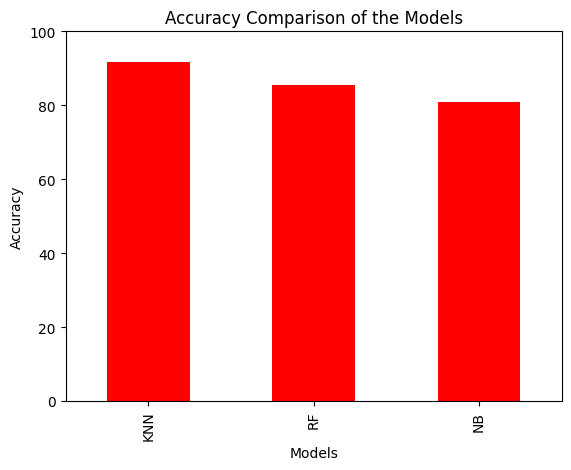

In [ ]:
# Comparison ploting

accuracy = {'Model': ['KNN', 'RF', 'NB'],
        'Accuracy': [knn_accuracy*100, rfc_accuracy*100, gnb_accuracy*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of the Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()